2022-12-11 03:14:43.982161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2390 files belonging to 5 classes.
Using 1912 files for training.


2022-12-11 03:14:47.575379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2390 files belonging to 5 classes.
Using 478 files for validation.
Epoch 1/12


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


60/60 [==============================] - 98s 2s/step - loss: 2.7449 - accuracy: 0.2829 - val_loss: 1.4833 - val_accuracy: 0.3577
Epoch 2/12
60/60 [==============================] - 97s 2s/step - loss: 1.3709 - accuracy: 0.4142 - val_loss: 1.3588 - val_accuracy: 0.4121
Epoch 3/12
60/60 [==============================] - 97s 2s/step - loss: 1.2996 - accuracy: 0.4555 - val_loss: 1.3432 - val_accuracy: 0.4331
Epoch 4/12
60/60 [==============================] - 89s 1s/step - loss: 1.1922 - accuracy: 0.5152 - val_loss: 1.1536 - val_accuracy: 0.5356
Epoch 5/12
60/60 [==============================] - 92s 2s/step - loss: 1.1152 - accuracy: 0.5513 - val_loss: 1.1278 - val_accuracy: 0.5523
Epoch 6/12
60/60 [==============================] - 97s 2s/step - loss: 1.0626 - accuracy: 0.5826 - val_loss: 1.2656 - val_accuracy: 0.5230
Epoch 7/12
60/60 [==============================] - 90s 1s/step - loss: 1.0129 - accuracy: 0.6036 - val_loss: 1.1425 - val_accuracy: 0.5711
Epoch 8/12
60/60 [=============

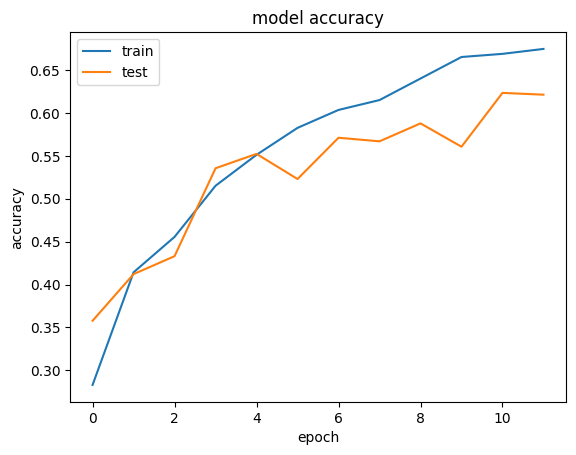

In [2]:
import numpy as np
import os
# import PIL
# import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

dataDir = "/code/archive/garbage_classification/Garbage_classification"

imgHeight = 384
imgWidth = 512
batchSize = 32

trainDs = tf.keras.utils.image_dataset_from_directory(
  dataDir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

valDs = tf.keras.utils.image_dataset_from_directory(
  dataDir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

AUTOTUNE = tf.data.AUTOTUNE

trainDs = trainDs.cache().prefetch(buffer_size=AUTOTUNE)
valDs = valDs.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.1)
])

data_augmentation2 = tf.keras.Sequential([
  layers.RandomContrast(0.3),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(int(imgHeight/2), int(imgWidth/2)),
  layers.Rescaling(1./255)
])

model = tf.keras.Sequential()
model.add(resize_and_rescale),
model.add(data_augmentation),
model.add(layers.Conv2D(32, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(64, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(128, (3, 3), activation='relu')),
model.add(layers.Dropout(0.3))
model.add(layers.Flatten()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(5, activation='softmax')),



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainDs, epochs=12, 
                    validation_data=valDs)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [12]:
img = tf.io.read_file("/code/test_images/glass1.jpg")
tensor = tf.io.decode_image(img, channels=3, dtype=tf.dtypes.float32)
tensor = tf.image.resize(tensor, [imgHeight, imgWidth])
input_tensor = tf.expand_dims(tensor, axis=0)

prediction = model.predict(input_tensor)
print(prediction)
maxValue = max(prediction[0])
print("Max probability",maxValue)

# Set classes labels
classes = ['Cardboard','Glass','Metal','Paper','Plastic']

print("Predicted index",np.where(prediction[0] == maxValue)[0][0])
print("Predicted class:",classes[np.where(prediction[0] == maxValue)[0][0]])
print(sum(prediction[0]))

1/1 [==============================] - 0s 75ms/step
[[0.0000000e+00 5.1580932e-24 1.0000000e+00 0.0000000e+00 3.2621253e-26]]
Max probability 1.0
Predicted index 2
Predicted class: Metal
1.0
